# Create QR code

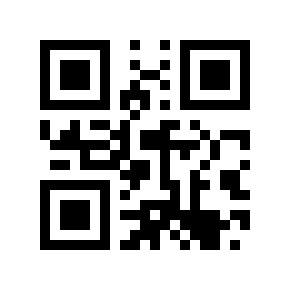

In [61]:
import qrcode
img = qrcode.make('Some data here')
type(img) 
img.save("example_assets/qrcode1.png")
img

# Create VCard

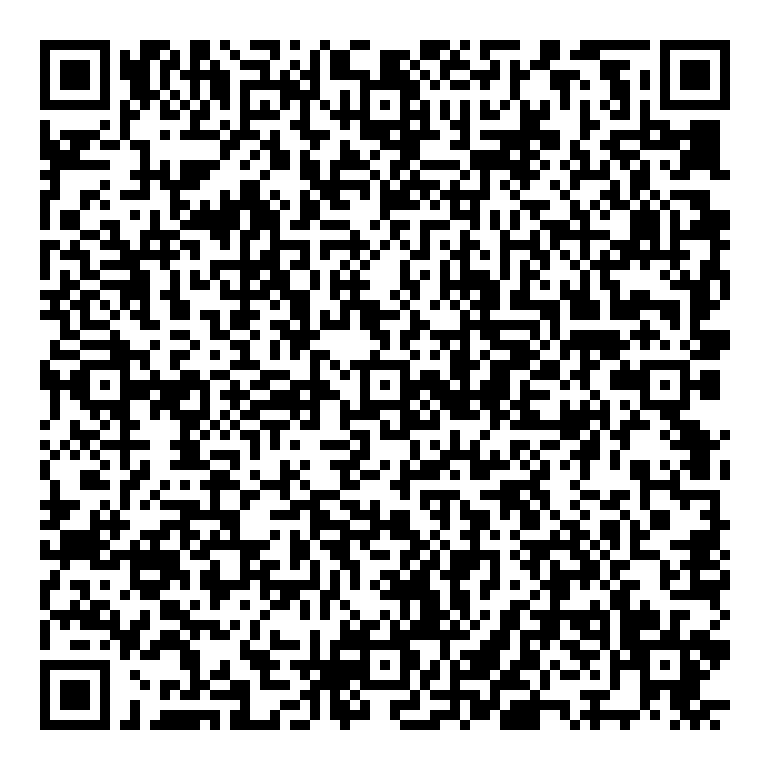

In [62]:
import qrcode
img = qrcode.make('''
BEGIN:VCARD
VERSION:3.0
N:Gump;Forrest;;Mr.;
FN:Forrest Gump
ORG:Bubba Gump Shrimp Co.
TEL;TYPE=Work:011 555-1212
TEL;TYPE=mobile:072 434-1202
ADR;TYPE=Work,PREF:;;100 Waters Edge;Baytown;LA;30314;USA
LABEL;TYPE=Work,PREF:100 Waters Edge\nBaytown\, LA 30314\nUSA
EMAIL;TYPE=Work:forrestgump@example.com
END:VCARD
''')
type(img)
img.save("example_assets/vcard.png")
img

# Create iCal

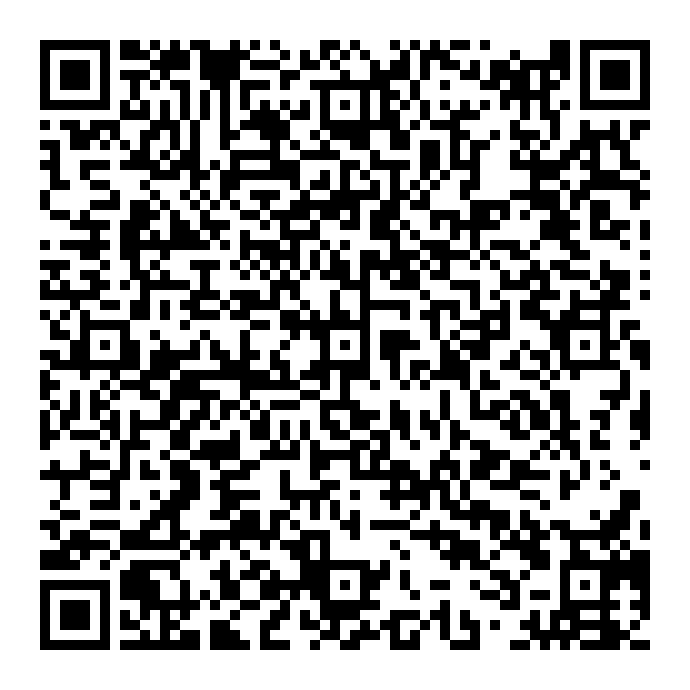

In [63]:
import qrcode
img = qrcode.make('''
BEGIN:VCALENDAR
VERSION:2.0
PRODID:-//ABC Corporation//NONSGML My Product//EN
BEGIN:VEVENT
SUMMARY:Lunchtime meeting
DTSTART;TZID=America/New_York:20230420T120000
DURATION:PT1H
LOCATION:Meeting Room 1
END:VEVENT
END:VCALENDAR
''')
type(img)
img.save("example_assets/vcal.png")
img

# Styling

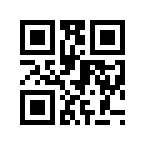

In [64]:
import qrcode
qr = qrcode.QRCode(
    version=1, #qr code size: 1-40 where 1 is the smallest
    error_correction=qrcode.constants.ERROR_CORRECT_L, #error correction: L,M,Q,H where H is the most randomised
    box_size=5, #how many pixels each box is
    border=4, #how many boxes wide the border is: minimum 4
)
qr.add_data('Some data here')
qr.make(fit=True)

img = qr.make_image(fill_color="black", back_color="white") #can be RGB color tuples
img

# Styling the eyes

In [65]:
import PIL
from PIL import Image, ImageDraw

#Custom function for eye styling. These create the eye masks

def style_inner_eyes(img):
  img_size = img.size[0]
  eye_size = 70 #default
  quiet_zone = 40 #default
  mask = Image.new('L', img.size, 0)
  draw = ImageDraw.Draw(mask)
  draw.rectangle((60, 60, 90, 90), fill=255) #top left eye
  draw.rectangle((img_size-90, 60, img_size-60, 90), fill=255) #top right eye
  draw.rectangle((60, img_size-90, 90, img_size-60), fill=255) #bottom left eye
  return mask

def style_outer_eyes(img):
  img_size = img.size[0]
  eye_size = 70 #default
  quiet_zone = 40 #default
  mask = Image.new('L', img.size, 0)
  draw = ImageDraw.Draw(mask)
  draw.rectangle((40, 40, 110, 110), fill=255) #top left eye
  draw.rectangle((img_size-110, 40, img_size-40, 110), fill=255) #top right eye
  draw.rectangle((40, img_size-110, 110, img_size-40), fill=255) #bottom left eye
  draw.rectangle((60, 60, 90, 90), fill=0) #top left eye
  draw.rectangle((img_size-90, 60, img_size-60, 90), fill=0) #top right eye
  draw.rectangle((60, img_size-90, 90, img_size-60), fill=0) #bottom left eye  
  return mask  

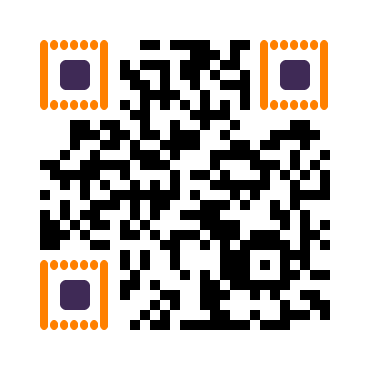

In [159]:
import qrcode
from qrcode.image.styledpil import StyledPilImage
from qrcode.image.styles.moduledrawers import RoundedModuleDrawer,VerticalBarsDrawer,SquareModuleDrawer
from  qrcode.image.styles.colormasks import SolidFillColorMask

if not hasattr(PIL.Image, 'Resampling'):
  PIL.Image.Resampling = PIL.Image
# Now PIL.Image.Resampling.BICUBIC is always recognized.


qr = qrcode.QRCode(error_correction=qrcode.constants.ERROR_CORRECT_H)

qr.add_data('http://www.medium.com')

qr_inner_eyes_img = qr.make_image(image_factory=StyledPilImage,
                            eye_drawer=RoundedModuleDrawer(radius_ratio=1.2),
                            color_mask=SolidFillColorMask(back_color=(255, 255, 255), front_color=(63, 42, 86)))

qr_outer_eyes_img = qr.make_image(image_factory=StyledPilImage,
                            eye_drawer=VerticalBarsDrawer(),
                            color_mask=SolidFillColorMask(front_color=(255, 128, 0)))                            

qr_img = qr.make_image(image_factory=StyledPilImage,
                       module_drawer=SquareModuleDrawer())

inner_eye_mask = style_inner_eyes(qr_img)
outer_eye_mask = style_outer_eyes(qr_img)
intermediate_img = Image.composite(qr_inner_eyes_img, qr_img, inner_eye_mask)
final_image = Image.composite(qr_outer_eyes_img, intermediate_img, outer_eye_mask)
final_image.save('example_assets/final_eyes_image.png')
final_image

# Adding logos

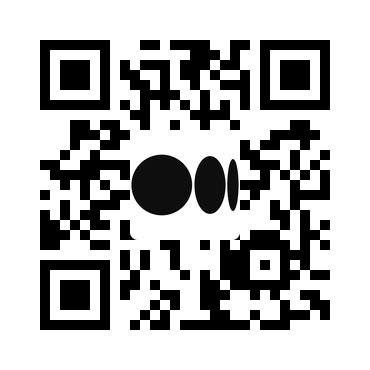

In [158]:
import PIL
from PIL import Image, ImageDraw
import qrcode
from qrcode.image.styledpil import StyledPilImage
from qrcode.image.styles.moduledrawers import RoundedModuleDrawer, CircleModuleDrawer
from qrcode.image.styles.moduledrawers import VerticalBarsDrawer
from  qrcode.image.styles.colormasks import SolidFillColorMask


if not hasattr(PIL.Image, 'Resampling'):
  PIL.Image.Resampling = PIL.Image
# Now PIL.Image.Resampling.BICUBIC is always recognized.


def add_corners(im, rad):
    circle = Image.new('L', (rad * 2, rad * 2), 0)
    draw = ImageDraw.Draw(circle)
    draw.ellipse((0, 0, rad * 2 - 1, rad * 2 - 1), fill=255)
    alpha = Image.new('L', im.size, 255)
    w, h = im.size
    alpha.paste(circle.crop((0, 0, rad, rad)), (0, 0))
    alpha.paste(circle.crop((0, rad, rad, rad * 2)), (0, h - rad))
    alpha.paste(circle.crop((rad, 0, rad * 2, rad)), (w - rad, 0))
    alpha.paste(circle.crop((rad, rad, rad * 2, rad * 2)), (w - rad, h - rad))
    im.putalpha(alpha)
    return im

im = Image.open('example_assets/my-logo.png')
im = add_corners(im, 100)
im.save('example_assets/my-rounded-logo.png')


qr = qrcode.QRCode(
    version=1,
    error_correction=qrcode.constants.ERROR_CORRECT_H
)

qr.add_data('http://www.medium.com')
                          

qr_img = qr.make_image(image_factory=StyledPilImage,
                       embeded_image_path="example_assets/my-rounded-logo.png")

qr_img.save('example_assets/my-logo-qrcode.png')
qr_img

# Color mask

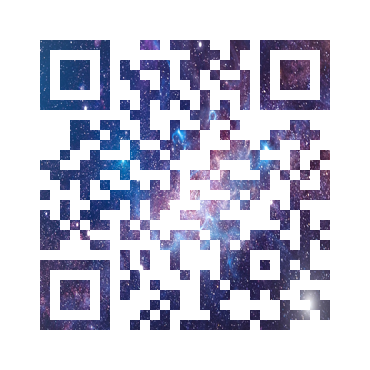

In [157]:
import qrcode
import PIL
from qrcode.image.styledpil import StyledPilImage
from qrcode.image.styles.moduledrawers import SquareModuleDrawer, RoundedModuleDrawer

from  qrcode.image.styles.colormasks import ImageColorMask
from PIL import Image, ImageDraw

if not hasattr(PIL.Image, 'Resampling'):
  PIL.Image.Resampling = PIL.Image
# Now PIL.Image.Resampling.BICUBIC is always recognized.


qr = qrcode.QRCode(version=1,error_correction=qrcode.constants.ERROR_CORRECT_H)

qr.add_data('http://www.medium.com')
                         

qr_img = qr.make_image(image_factory=StyledPilImage,
                       color_mask=ImageColorMask(color_mask_path='example_assets/image-color-mask.png'))

qr_img.save('example_assets/my-colormask-qrcode.png')
qr_img

# Bringing it together

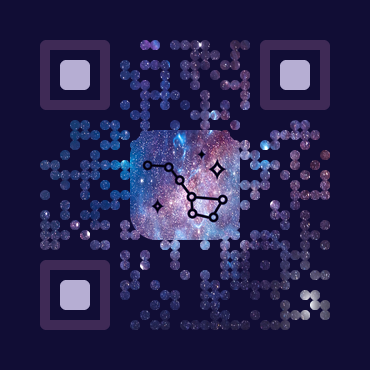

In [156]:
import qrcode
from qrcode.image.styledpil import StyledPilImage
from qrcode.image.styles.moduledrawers import RoundedModuleDrawer,CircleModuleDrawer
from  qrcode.image.styles.colormasks import SolidFillColorMask

if not hasattr(PIL.Image, 'Resampling'):
  PIL.Image.Resampling = PIL.Image
# Now PIL.Image.Resampling.BICUBIC is always recognized.

im = Image.open('galaxy_assets/my-final-logo.png')
im = add_corners(im, 100)
im.save('galaxy_assets/my-final-rounded-logo.png')


qr = qrcode.QRCode(error_correction=qrcode.constants.ERROR_CORRECT_H)

qr.add_data('http://www.medium.com')

qr_inner_eyes_img = qr.make_image(image_factory=StyledPilImage,
                            eye_drawer=RoundedModuleDrawer(radius_ratio=1.2),
                            color_mask=SolidFillColorMask(back_color=(17, 13, 53), front_color=(182, 174, 211)))

qr_outer_eyes_img = qr.make_image(image_factory=StyledPilImage,
                            eye_drawer=RoundedModuleDrawer(radius_ratio=1.2),
                            color_mask=SolidFillColorMask(back_color=(17, 13, 53),front_color=(63, 42, 86)))                            

qr_img = qr.make_image(image_factory=StyledPilImage,
                       module_drawer=CircleModuleDrawer(),
                       color_mask=ImageColorMask(back_color=(17, 13, 53),color_mask_path='galaxy_assets/image-color-mask.png'),
                       embeded_image_path="galaxy_assets/my-final-rounded-logo.png")

inner_eye_mask = style_inner_eyes(qr_img)
outer_eye_mask = style_outer_eyes(qr_img)
intermediate_img = Image.composite(qr_inner_eyes_img, qr_img, inner_eye_mask)
final_image = Image.composite(qr_outer_eyes_img, intermediate_img, outer_eye_mask)
final_image.save('galaxy_assets/final_image.png')
final_image

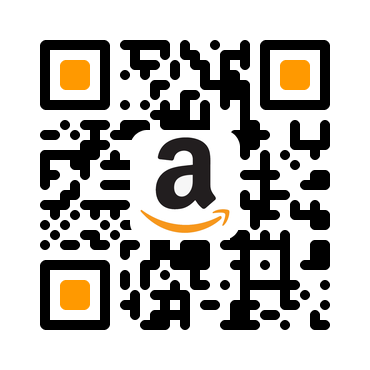

In [94]:
import qrcode
from qrcode.image.styledpil import StyledPilImage
from qrcode.image.styles.moduledrawers import RoundedModuleDrawer
from  qrcode.image.styles.colormasks import SolidFillColorMask

if not hasattr(PIL.Image, 'Resampling'):
  PIL.Image.Resampling = PIL.Image
# Now PIL.Image.Resampling.BICUBIC is always recognized.

im = Image.open('amazon_assets/amazon-logo.png')
im = add_corners(im, 100)
im.save('amazon_assets/amazon-rounded-logo.png')


qr = qrcode.QRCode(error_correction=qrcode.constants.ERROR_CORRECT_H)

qr.add_data('http://www.amazon.com')

qr_inner_eyes_img = qr.make_image(image_factory=StyledPilImage,
                            eye_drawer=RoundedModuleDrawer(radius_ratio=1.2),
                            color_mask=SolidFillColorMask(front_color=(255, 153, 0)))

qr_outer_eyes_img = qr.make_image(image_factory=StyledPilImage,
                            eye_drawer=RoundedModuleDrawer(radius_ratio=1.2))                            

qr_img = qr.make_image(image_factory=StyledPilImage,
                       module_drawer=RoundedModuleDrawer(),
                       embeded_image_path="amazon_assets/amazon-rounded-logo.png")

inner_eye_mask = style_inner_eyes(qr_img)
outer_eye_mask = style_outer_eyes(qr_img)
intermediate_img = Image.composite(qr_inner_eyes_img, qr_img, inner_eye_mask)
final_image = Image.composite(qr_outer_eyes_img, intermediate_img, outer_eye_mask)
final_image.save("amazon_assets/amazon_image.png")
final_image

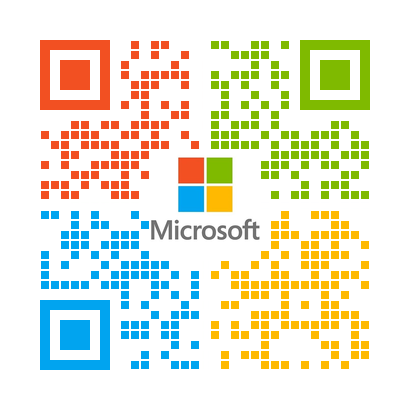

In [187]:
import qrcode
from qrcode.image.styledpil import StyledPilImage
from qrcode.image.styles.moduledrawers import RoundedModuleDrawer, GappedSquareModuleDrawer
from  qrcode.image.styles.colormasks import SolidFillColorMask

if not hasattr(PIL.Image, 'Resampling'):
  PIL.Image.Resampling = PIL.Image
# Now PIL.Image.Resampling.BICUBIC is always recognized.

im = Image.open('microsoft_assets/microsoft-logo.jpg')
im = add_corners(im, 100)
im.save('microsoft_assets/microsoft-rounded-logo.png')


qr = qrcode.QRCode(version=4,
                   error_correction=qrcode.constants.ERROR_CORRECT_H)

qr.add_data('http://www.google.com')


qr_img = qr.make_image(image_factory=StyledPilImage,
                       module_drawer=GappedSquareModuleDrawer(),
                       color_mask=ImageColorMask(color_mask_path='microsoft_assets/microsoft-logo.jpg'),
                       embeded_image_path="microsoft_assets/microsoft-text-logo.jpg"
                       )

qr_img.save("microsoft_assets/microsoft_image.png")
qr_img